In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import itertools
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import euclidean_distances

In [170]:
sampled_book_df = pd.read_csv("sampled_book_validation.csv",dtype=str)
from ast import literal_eval
sampled_book_df["embeddings"] = sampled_book_df.embeddings.apply(literal_eval)

In [172]:
sample_distance_embed = euclidean_distances(np.array(sampled_book_df.embeddings.tolist()))
sample_distance_grid = euclidean_distances(sampled_book_df[["x", "y"]].astype(float).to_numpy())

In [173]:
student_df_long = pd.read_csv("prolific_validation.csv", dtype=str)

In [174]:
sim_dict = {}
for i, j in itertools.combinations(sampled_book_df.isbn.tolist(), 2):
    sim_dict["{}_{}".format(i,j)] = []
    for index, row in student_df_long.iterrows():
        if ((row.similarity_book_1 == i) and (row.similarity_book_2 == j)) or ((row.similarity_book_1 == j) and (row.similarity_book_2 == i)):
            sim_dict["{}_{}".format(i,j)].append(row.similarity)

for i, j in sim_dict.items():
    sim_dict[i] = np.mean(np.array(j).astype(float))

par_sim = np.array(list(sim_dict.values()))
par_dist = 10-par_sim # this is the participants perceived distance

In [175]:
sampled_book_df

,Unnamed: 0,description,isbn,genre,x,y,embeddings
0,0,"From Andre Agassi, one of the most beloved ath...",0007281447,Biography,-7.0,2.0,"[0.0020671586971729994, 0.04567683860659599, 0..."
1,1,Tapestry of Hope weaves together the heartrend...,0764228943,Christian Fiction,7.0,5.0,"[-0.019166752696037292, 0.021190183237195015, ..."
2,2,An apocalyptic event has destroyed Evie's home...,1442352965,Fantasy,1.0,-5.0,"[-0.0376109704375267, 0.011206711642444134, 0...."
3,3,"My name is Larkspur, and I am an Elemental. My...",1508533628,Fantasy,5.0,-6.0,"[-0.009986204095184803, 0.031211096793413162, ..."
4,4,Waking up in hell was not Del Bellator’s idea ...,1942085079,Fantasy,3.0,-2.0,"[-0.04998351261019707, -0.026316272094845772, ..."
5,5,"Poland, 1939. A country, torn by the occupatio...",1986277240,Historical Fiction,-1.0,-7.0,"[-0.06137970834970474, 0.042997851967811584, -..."
6,6,"Lydia King knows what it's like to be in need,...",0764217518,Historical Fiction,6.0,3.0,"[-0.013492385856807232, 0.0073277209885418415,..."
7,7,"A wrong number, and a cry of desperation at th...",0989546349,Historical Fiction,4.0,5.0,"[-0.04945564642548561, -0.06915876269340515, 0..."
8,8,Cherry blossom check Smokey check Skinny check...,1492156361,Horror,2.0,6.0,"[-0.06636982411146164, -0.030774300917983055, ..."
9,9,A string of brutal murders has bodies piling u...,0985030224,Mystery,-3.0,6.0,"[-0.011356042698025703, -0.009430705569684505,..."


In [176]:
sample_distance_embed_series = sample_distance_embed[np.triu_indices(sample_distance_embed_df.shape[0],1)]
sample_distance_grid_series = sample_distance_grid[np.triu_indices(sample_distance_grid_df.shape[0],1)]

sample_distance_embed_df = pd.DataFrame(sample_distance_embed)
sample_distance_embed_df.columns = sampled_book_df.isbn.tolist()
sample_distance_embed_df.index = sampled_book_df.isbn.tolist()

sample_distance_grid_df = pd.DataFrame(sample_distance_grid)
sample_distance_grid_df.columns = sampled_book_df.isbn.tolist()
sample_distance_grid_df.index = sampled_book_df.isbn.tolist()

In [177]:
sample_distance_embed_df

,0007281447,0764228943,1442352965,1508533628,1942085079,1986277240,0764217518,0989546349,1492156361,0985030224,...,1517682142,0990523527,1503949362,1476755108,1979809836,1419970291,0316129062,1522659501,0141031387,0957487177
0007281447,0.000000,1.367580,1.343837,1.362986,1.317226,1.389364,1.350359,1.302956,1.350057,1.299558,...,1.377526,1.306486,1.227659,1.391204,1.355704,1.256683,1.292217,1.278380,1.351917,1.337938
0764228943,1.367580,0.000000,1.180949,1.307293,1.266727,1.255963,1.115799,1.204031,1.245011,1.352188,...,1.282068,1.232559,1.231223,1.217375,1.263850,1.259764,1.294559,1.327024,1.352562,1.327256
1442352965,1.343837,1.180949,0.000000,1.184681,1.150878,1.301541,1.190454,1.207986,1.124179,1.308147,...,1.344488,1.302938,1.307483,1.314369,1.257882,1.275432,1.266444,1.249166,1.273244,1.304586
1508533628,1.362986,1.307293,1.184681,0.000000,1.186848,1.342445,1.224493,1.297786,1.298567,1.361045,...,1.128693,1.199263,1.398006,1.384008,1.160307,1.233113,1.341887,1.313428,1.334002,1.342379
1942085079,1.317226,1.266727,1.150878,1.186848,0.000000,1.322011,1.189421,1.263493,1.097624,1.217919,...,1.199323,1.105217,1.209896,1.229879,1.122635,1.120243,1.304246,1.344813,1.225428,1.339657
1986277240,1.389364,1.255963,1.301541,1.342445,1.322011,0.000000,1.330260,1.223244,1.365580,1.357324,...,1.180026,1.284453,1.298546,1.305787,1.262496,1.311136,1.276504,1.166961,1.236065,1.229793
0764217518,1.350359,1.115799,1.190454,1.224493,1.189421,1.330260,0.000000,1.149851,1.163744,1.240576,...,1.325042,1.223748,1.220985,1.173877,1.231651,1.150985,1.333961,1.321567,1.285001,1.295938
0989546349,1.302956,1.204031,1.207986,1.297786,1.263493,1.223244,1.149851,0.000000,1.106575,1.128409,...,1.236533,1.095201,1.171564,1.217718,1.163092,1.172507,1.249511,1.322326,1.353904,1.245839
1492156361,1.350057,1.245011,1.124179,1.298567,1.097624,1.365580,1.163744,1.106575,0.000000,1.138983,...,1.309350,1.239655,1.149723,1.283327,1.146731,1.143441,1.262418,1.321699,1.207691,1.324650
0985030224,1.299558,1.352188,1.308147,1.361045,1.217919,1.357324,1.240576,1.128409,1.138983,0.000000,...,1.241333,1.197187,1.203080,1.199328,1.153857,1.175698,1.355160,1.389968,1.212321,1.219846


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


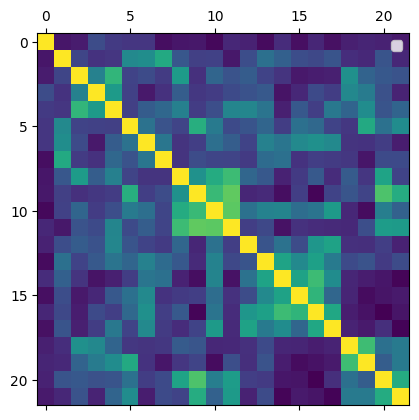

In [178]:
def mask_based_utri2mat(utri,ntotal):
    # Setup output array
    out = np.empty((ntotal,ntotal))

    # Create upper triang. mask
    mask = np.triu_indices(ntotal,1) 

    # Set upper triang. elements with mask
    out[mask] = utri

    np.fill_diagonal(out, 9)
    # Set lower triang. elements with transposed mask
    out.T[mask] = utri
    return out    


rated_similarity_matrix = mask_based_utri2mat(par_sim, 22)
plt.matshow(rated_similarity_matrix)                                            
plt.legend()

In [179]:
sample_distance_embed = sample_distance_embed_df.copy().to_numpy()
sample_distance_embed_temp = sample_distance_embed.copy()
sample_distance_embed_temp[np.tril_indices(22)] = np.nan
temp_mean = np.nanmean(sample_distance_embed_temp)
temp_std = np.nanstd(sample_distance_embed_temp)

similarity_embed_norm = (sample_distance_embed - temp_mean)/temp_std
np.fill_diagonal(similarity_embed_norm, similarity_embed_norm[similarity_embed_norm > similarity_embed_norm.min()].min())


rated_similarity_temp = rated_similarity_matrix.copy()
rated_similarity_temp[np.tril_indices(22)] = np.nan
temp_mean = np.nanmean(rated_similarity_temp)
temp_std = np.nanstd(rated_similarity_temp)

rated_similarity_matrix_norm = (rated_similarity_matrix - temp_mean)/temp_std

sample_distance_grid = sample_distance_grid_df.copy().to_numpy()
sample_distance_grid_temp = sample_distance_grid.copy()
sample_distance_grid_temp[np.tril_indices(22)] = np.nan
temp_mean = np.nanmean(sample_distance_grid_temp)
temp_std = np.nanstd(sample_distance_grid_temp)

similarity_grid_norm = (sample_distance_grid - temp_mean)/temp_std
np.fill_diagonal(similarity_grid_norm, similarity_grid_norm[similarity_grid_norm > similarity_grid_norm.min()].min())

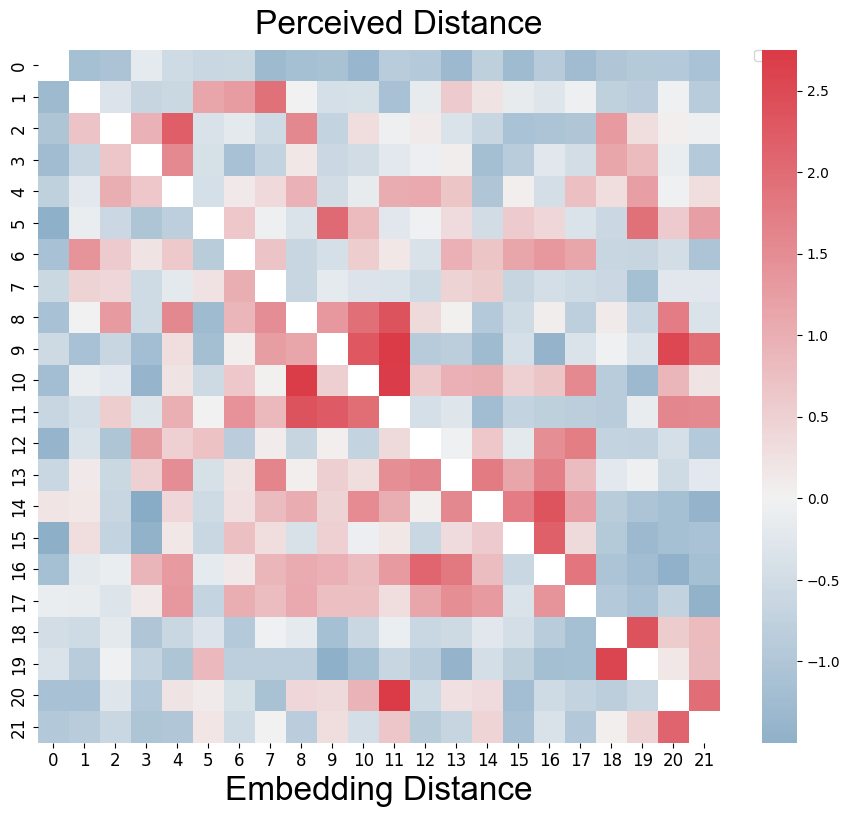

In [180]:
fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(240, 10, as_cmap=True)
mask1 = np.triu(np.ones_like(similarity_embed_norm))
mask2 = np.tril(np.ones_like(rated_similarity_matrix_norm))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(-similarity_embed_norm, cmap=cmap, center=0, mask=mask1,ax=ax, cbar=False)

sns.heatmap(rated_similarity_matrix_norm, cmap=cmap, center=0, ax=ax,mask=mask2)


handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.spines[['right', 'top']].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Embedding Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 24})

plt.text(7, -0.5, "Perceived Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 24})

plt.ylabel("", fontdict={'fontfamily': 'Arial', 'fontsize': 24})

plt.show()

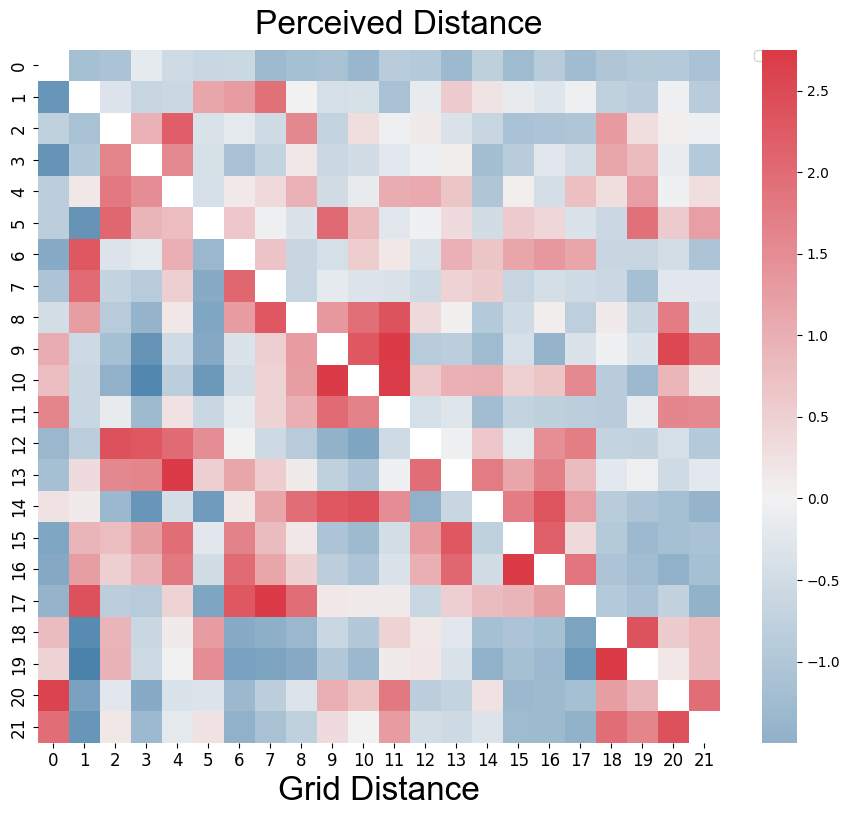

In [181]:
fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(240, 10, as_cmap=True)
mask1 = np.triu(np.ones_like(similarity_grid_norm))
mask2 = np.tril(np.ones_like(rated_similarity_matrix_norm))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(-similarity_grid_norm, cmap=cmap, center=0, mask=mask1,ax=ax, cbar=False
               # row_cluster=False, col_cluster=False
                  )

sns.heatmap(rated_similarity_matrix_norm, cmap=cmap, center=0, ax=ax,mask=mask2
                           # row_cluster=False, col_cluster=False
           )

handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


ax.spines[['right', 'top']].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.xlabel("Grid Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 24})

plt.text(7, -0.5, "Perceived Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 24})

plt.ylabel("", fontdict={'fontfamily': 'Arial', 'fontsize': 24})


plt.show()

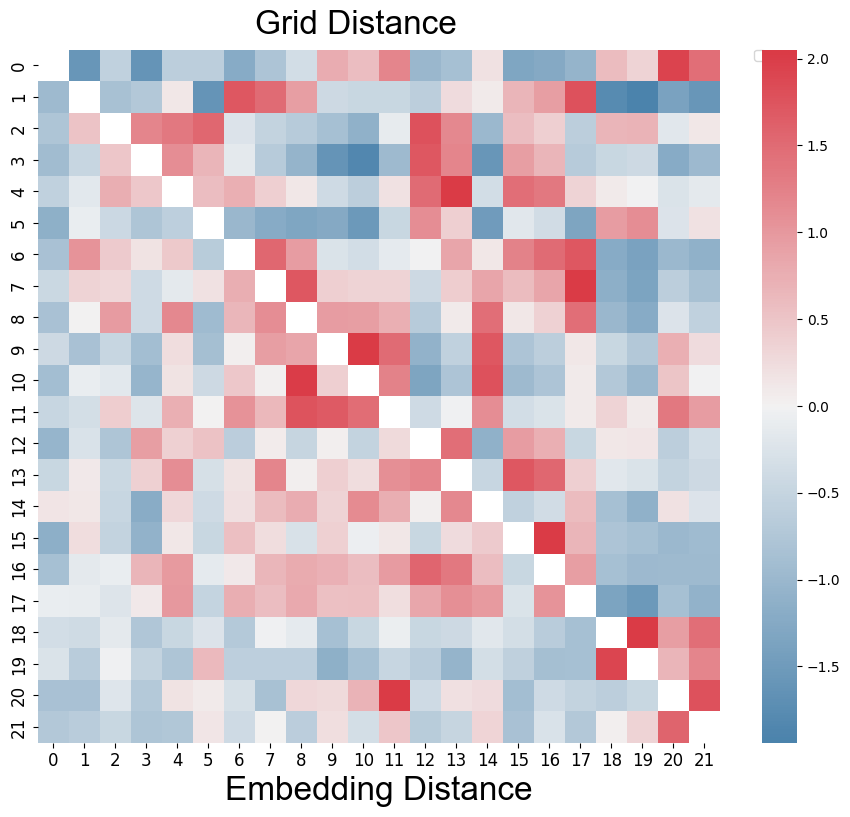

In [183]:
fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(240, 10, as_cmap=True)
mask1 = np.triu(np.ones_like(similarity_grid_norm))
mask2 = np.tril(np.ones_like(rated_similarity_matrix_norm))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(-similarity_embed_norm, cmap=cmap, center=0, mask=mask1,ax=ax, cbar=False
                  )

sns.heatmap(-similarity_grid_norm, cmap=cmap, center=0, ax=ax,mask=mask2
           )


handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


ax.spines[['right', 'top']].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.xlabel("Embedding Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 24})

plt.text(7, -0.5, "Grid Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 24})

plt.ylabel("", fontdict={'fontfamily': 'Arial', 'fontsize': 24})


plt.show()


Text(0, 0.5, 'Grid Distance')

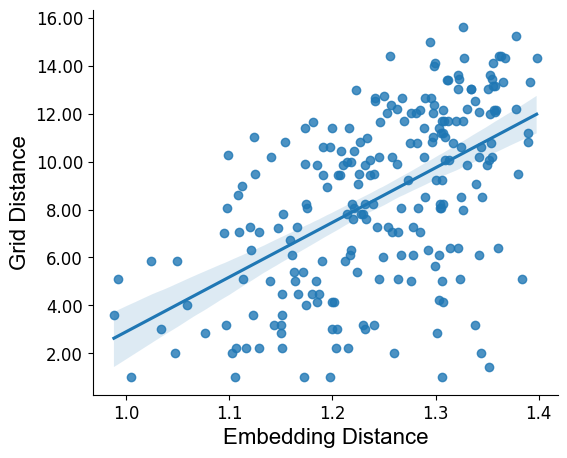

In [182]:
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots(figsize=(6, 5))
# plt.scatter(sample_distance_grid_series, par_dist)
sns.regplot(x=sample_distance_embed_series, y=sample_distance_grid_series)


ax.spines[['right', 'top']].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.xlabel("Embedding Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 16})
plt.ylabel("Grid Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 16})

Text(0, 0.5, 'Perceived Distance')

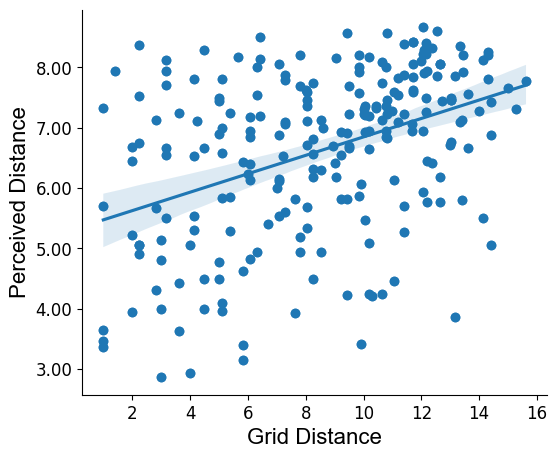

In [184]:
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(sample_distance_grid_series, par_dist)
sns.regplot(x=sample_distance_grid_series, y=par_dist)


ax.spines[['right', 'top']].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.xlabel("Grid Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 16})
plt.ylabel("Perceived Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 16})

Text(0, 0.5, 'Perceived Distance')

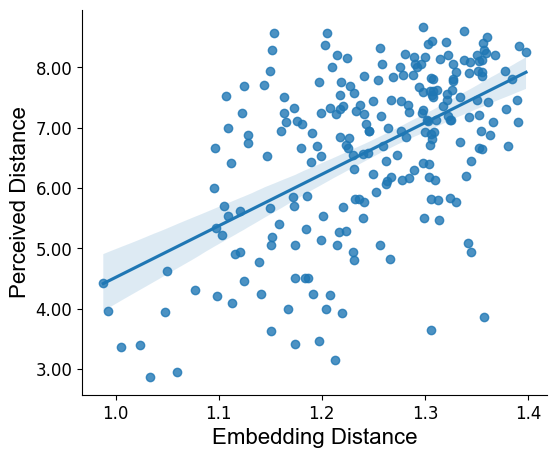

In [185]:
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots(figsize=(6, 5))
# plt.scatter(sample_distance_grid_series, par_dist)
sns.regplot(x=sample_distance_embed_series, y=par_dist)


ax.spines[['right', 'top']].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.xlabel("Embedding Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 16})
plt.ylabel("Perceived Distance", fontdict={'fontfamily': 'Arial', 'fontsize': 16})

In [186]:
print(pearsonr(par_sim[~np.isnan(par_sim)], 10-sample_distance_embed_series[~np.isnan(par_sim)]))
print(pearsonr(par_sim[~np.isnan(par_sim)], 10-sample_distance_mds_series[~np.isnan(par_sim)]))
print(pearsonr(par_sim[~np.isnan(par_sim)], 10-sample_distance_grid_series[~np.isnan(par_sim)]))

PearsonRResult(statistic=0.546336630563215, pvalue=2.2443915346915816e-19)
PearsonRResult(statistic=0.11927563763631391, pvalue=0.07037903449505786)
PearsonRResult(statistic=0.41012386278642354, pvalue=8.746914951698069e-11)


In [187]:
print(pearsonr(sample_distance_embed_series[~np.isnan(par_sim)], 10-sample_distance_grid_series[~np.isnan(par_sim)]))

PearsonRResult(statistic=-0.5437631940957195, pvalue=3.5608073608984457e-19)


In [188]:
print(pearsonr(par_sim[~np.isnan(par_sim)], 10-sample_distance_embed_series[~np.isnan(par_sim)]))
print(pearsonr(par_sim[~np.isnan(par_sim)], 10-sample_distance_mds_series[~np.isnan(par_sim)]))
print(pearsonr(par_sim[~np.isnan(par_sim)], 10-sample_distance_grid_series[~np.isnan(par_sim)]))

PearsonRResult(statistic=0.546336630563215, pvalue=2.2443915346915816e-19)
PearsonRResult(statistic=0.11927563763631391, pvalue=0.07037903449505786)
PearsonRResult(statistic=0.41012386278642354, pvalue=8.746914951698069e-11)


In [189]:
import mantel

In [54]:
result_embed = mantel.test(sample_distance_embed_series, par_dist, perms=10000, method='pearson', tail='two-tail', ignore_nans=True)
result_mds = mantel.test(sample_distance_mds_series, par_dist, perms=10000, method='pearson', tail='two-tail', ignore_nans=True)
result_grid = mantel.test(sample_distance_grid_series, par_dist, perms=10000, method='pearson', tail='two-tail', ignore_nans=True)
result_embed_grid = mantel.test(sample_distance_grid_series, sample_distance_embed_series, perms=10000, method='pearson', tail='two-tail', ignore_nans=True)

In [55]:
print(result_embed)
print(result_mds)
print(result_grid)
print(result_embed_grid)

MantelResult(0.5463365965443062, 0.0001, 7.24795083958935)
MantelResult(0.4515234396989426, 0.0001, 6.722050067709253)
MantelResult(0.4101238627864234, 0.0001, 6.1987564238449355)
MantelResult(0.5437631629252137, 0.0001, 8.187672720943674)


In [87]:
print(result_embed.z)
print(result_mds.z)
print(result_grid.z)
print(result_embed_grid.z)

7.24795083958935
6.722050067709253
6.1987564238449355
8.187672720943674
